In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

### 数据集导入及基本分析

In [2]:
wine = load_wine()   #sklearn中的sklearn.datasets中包含了许多常用的数据集，例如鸢尾花，葡萄酒，波士顿房价等

In [4]:
wine.data 

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
#切分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape

(124, 13)

In [15]:
Xtest.shape

(54, 13)

In [12]:
wine.data.shape

(178, 13)

### 决策树的重要入参参数

In [66]:
clf= tree.DecisionTreeClassifier(criterion='entropy')
clf= clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)  #score用于评估测试集的准确度
score

0.9166666666666666

In [57]:
#画出一棵树吧
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素'
    ,'颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz

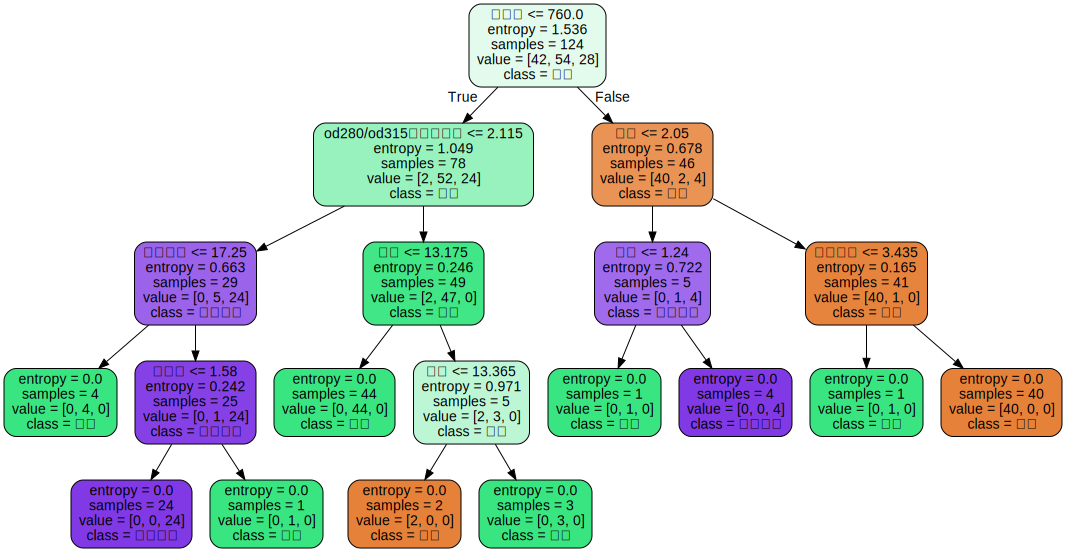

In [36]:
dot_data = tree.export_graphviz(clf
                     ,out_file=None
                     ,feature_names=feature_name
                     ,class_names=["琴酒","雪莉","贝尔摩德"]
                     ,filled=True
                     ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [32]:
df = pd.DataFrame(Xtrain)
df.columns = feature_name
df.describe()

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.00000,124.000000
mean,12.994355,2.333468,2.356452,19.301613,99.387097,2.295645,2.077984,0.360726,1.571694,4.873145,0.970774,2.65121,743.637097
std,0.843848,1.111018,0.283644,3.327832,14.356500,0.630846,1.005112,0.125609,0.568080,2.157369,0.220333,0.69428,317.002868
min,11.030000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.140000,0.410000,1.280000,0.560000,1.27000,278.000000
25%,12.330000,1.610000,2.207500,16.800000,88.000000,1.772500,1.272500,0.260000,1.242500,3.230000,0.807500,2.05750,501.500000
50%,13.075000,1.850000,2.335000,19.050000,97.000000,2.375000,2.180000,0.340000,1.560000,4.600000,0.980000,2.81500,676.500000
75%,13.675000,3.132500,2.545000,21.125000,108.000000,2.800000,2.892500,0.435000,1.927500,5.910000,1.100000,3.20000,993.750000
max,14.830000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.660000,3.580000,11.750000,1.710000,3.92000,1680.000000


In [83]:
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter="random")  #random_state设置随机数种子，输入“splitter=random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。推荐在数据量大的时候使用
clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9444444444444444

In [88]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.2)
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=999999
                                ,splitter="random"
                               ,max_depth=3)
clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9722222222222222

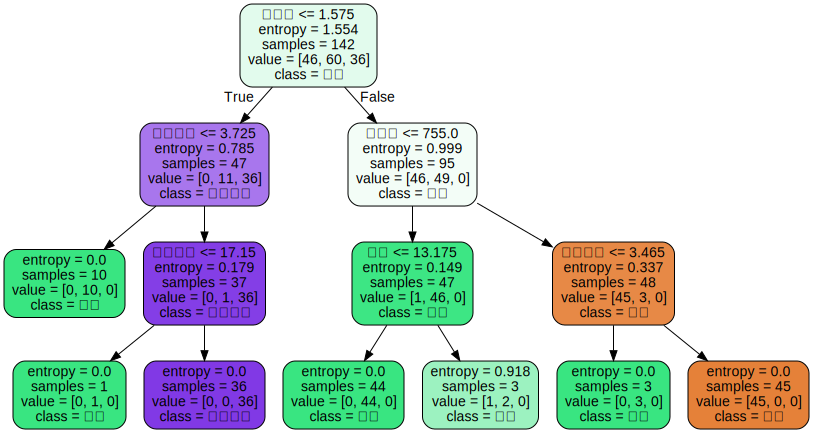

In [89]:
dot_data = tree.export_graphviz(clf
                     ,out_file=None
                     ,feature_names=feature_name
                     ,class_names=["琴酒","雪莉","贝尔摩德"]
                     ,filled=True
                     ,rounded=True)
graph = graphviz.Source(dot_data)
graph

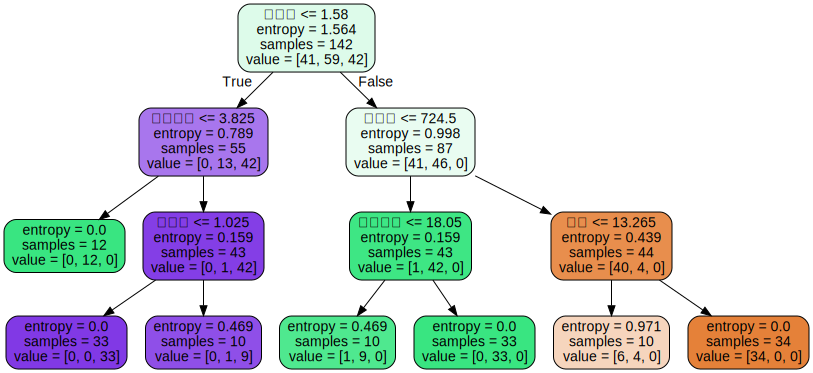

In [91]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.2)
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=999999
#                                 ,splitter="random"
                                ,max_depth=3
                                ,min_samples_leaf=10 #分支后的最小样本树，小于这个数该分支不会进行，一般=5开始，搭配max_depth
                                ,min_samples_split=5)#一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝
clf.fit(Xtrain,Ytrain)

dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph

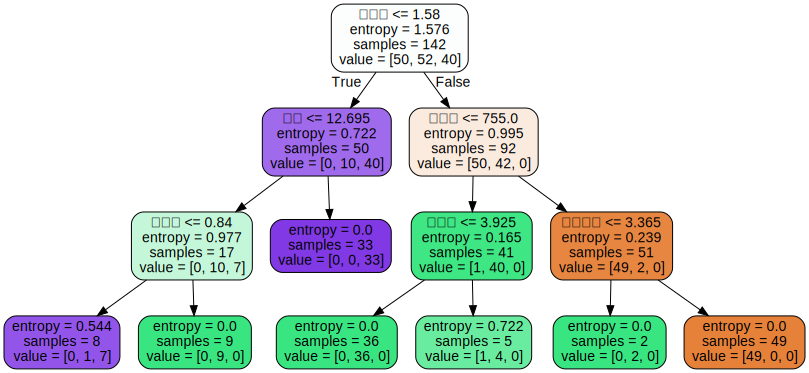

In [92]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.2)
clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=999999
#                                 ,splitter="random"
                                ,max_depth=3
#                                 ,min_samples_leaf=10 #分支后的最小样本树，小于这个数该分支不会进行，一般=5开始，搭配max_depth
#                                 ,min_samples_split=5 #一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝
                               ,max_features=4 #暴力方式限定至多考虑特征个数，可以使用PCA,SVD对数据降维处理如有必要。
                               ,min_impurity_decrease=0.5)
clf.fit(Xtrain,Ytrain)

dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph

### 确认最优的剪枝参数

<IPython.core.display.Javascript object>


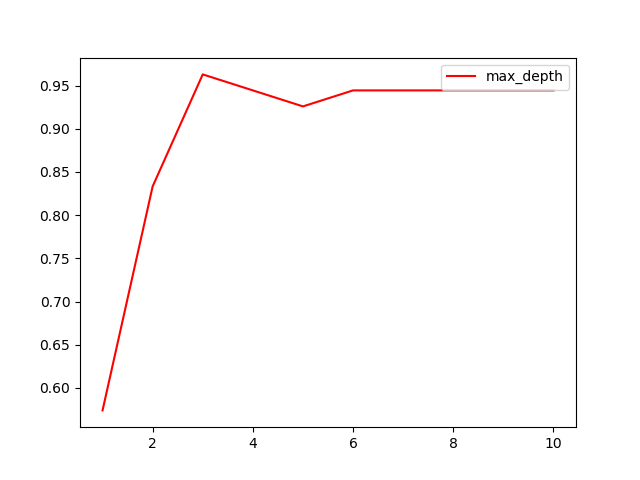

In [118]:
%matplotlib notebook
import matplotlib.pyplot as plt
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
test = []
for i in range(10):
    clf=tree.DecisionTreeClassifier(criterion='entropy'
                                ,random_state=30
                                ,splitter="random"
                                ,max_depth=i+1
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color='red',label='max_depth')
plt.legend()
plt.show()

In [119]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([25,  4, 25, 25, 25, 10,  4, 25, 25, 15, 21, 25, 13, 20, 13, 20, 15,
       25,  4, 25, 13, 20,  4,  4,  9, 25,  4, 13, 15,  9, 25, 20,  9, 25,
       25,  4,  4,  4,  4, 13, 25, 21, 20,  4,  4, 25, 13,  4, 15, 25, 21,
       25, 25,  4], dtype=int64)

In [120]:
#predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2,
       2, 0, 1, 2, 1, 0, 0, 0, 0, 2])